In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import matplotlib
import numpy as np
from matplotlib.lines import Line2D

percent = 25
data = []

population_size = {5: 242925, 15: 728189, 25: 1216597}

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import matplotlib
import numpy as np
from matplotlib.lines import Line2D


city = 2 # 1 - samara, 2 - chelyabinsk, 


population_size = {1: 100000, 2: 100000, 5: 243141, 15: 729423, 25: 1215706}
num_of_results = 9




def get_data(percent):
    epid_data = [pd.read_csv(f'results/'  + r'{}'.format(percent) + f'/temp_results_{i}.csv', 
                            sep='\t', dtype=int) for i in range(num_of_results)]
    data = []
    min_len = min([len(i) for i in epid_data])
    for i in range(num_of_results):
        data.append(epid_data[i]['H1N1'].values[:min_len])
    data = np.array(data)/population_size[percent]*100000

    mean_data = np.mean(data, axis=0)
    days = np.linspace(1,len(mean_data), len(mean_data))
    confidence = 3*np.std(data, axis=0)
    print("Maximum day of simulation for all processed:", min_len)
    return days, data, mean_data, confidence

# days, data, mean_data, confidence = get_data(5)
# days_chelyabinsk, data_shelyabinsk, confidence_chelyabinsk = get_data(2)

Maximum day of simulation for all processed: 149
Maximum day of simulation for all processed: 149
Maximum day of simulation for all processed: 149
2405.4172498902094
5051.587959859292
11630.534941105096


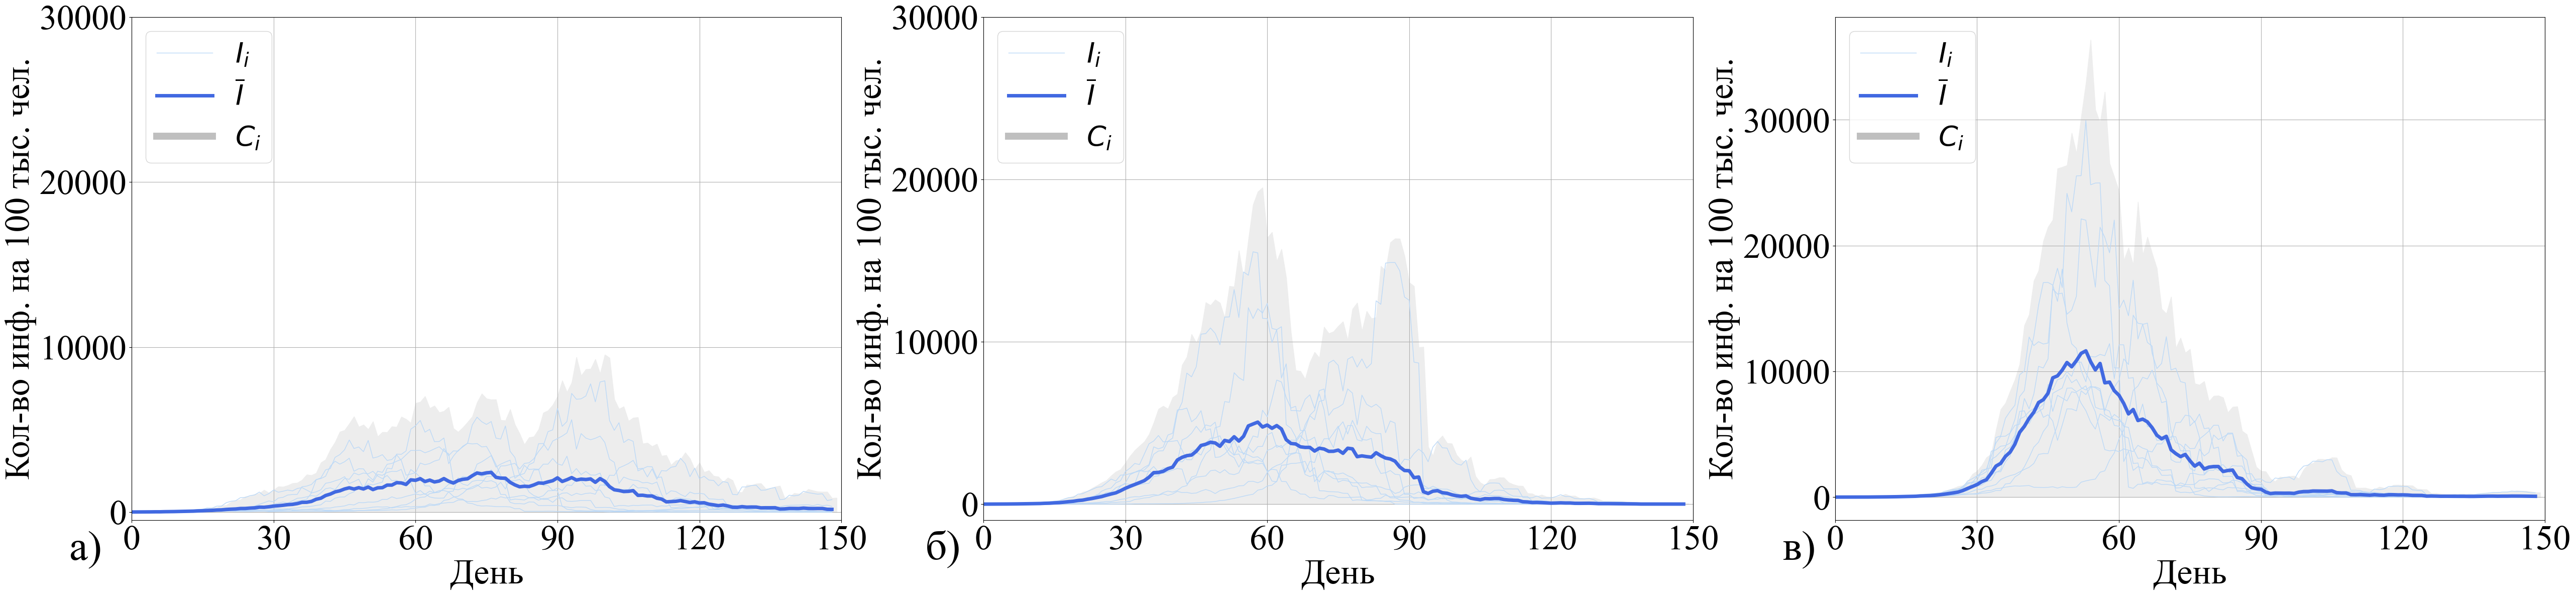

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
title_font_size = 60 
axis_font_size = 50 
ticks_font_size = 50 
legend_font_size = 40 
title_pad = 10 


def plot_samples():
    matplotlib.pyplot.rcParams.update({
    # 'text.usetex' : True,
    # 'font.family' : 'STIXGeneral',
    'font.family' : 'Times New Roman',
    })

    # plt.rc( 'text', usetex=True ) 
    # plt.rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
    # plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
    plt.rc('font',family = 'Times New Roman',  size=20)
    fig, axs = plt.subplots(1, 3, figsize=(62, 13))
    days_arr, data_arr, mean_data_arr, confidence_arr = [], [], [], []
    
    len_days = 150
    
    for i in range(1, 4):
        sample_percent = 10*(i-1) + 5
        days, data, mean_data, confidence = get_data(sample_percent) 
        days_arr.append(days)
        data_arr.append(data)
        mean_data_arr.append(mean_data)
        confidence_arr.append(confidence)
    
    i = 0
    for days, data, mean_data, confidence in zip(days_arr, data_arr, mean_data_arr, confidence_arr):
        print(max(mean_data))
        conf_low = [mean_data[i] - confidence[i] if mean_data[i] - confidence[i] > 0 else 0 for i in range(len(mean_data))] 
        for sample in data:
            axs[i].plot(sample, linewidth=1, color='#bcd9f7') 
        axs[i].plot(mean_data, '-', color = 'RoyalBlue', linewidth=5)
        axs[i].fill_between(days, conf_low, mean_data + confidence, 
                 color='#ededed')
# ax.plot([plot_confidence_interval(i, [int(j['H1N1'][i]) for j in percent_data]) for i in range(99)], color='blue', label='15% sampling')

        custom_lines = [Line2D([0], [0], color='#bcd9f7', lw=1),
                Line2D([0], [0], color='royalblue', lw=5),
                Line2D([0], [0], color='gray', lw=10, alpha=0.5)]

        axs[i].legend(custom_lines, [r'$I_i$', r'$\overline{I}$', r'$С_i$'],
          fontsize=legend_font_size, loc='upper left')

        axs[i].set_xlabel('День', fontsize=axis_font_size)
        # axs[i].set_xlim([0,len(days)])
        axs[i].set_xlim([0,len_days])
        # axs[i].set_ylim([0,0.03])

        axs[i].set_ylabel('Кол-во инф. на 100 тыс. чел.', fontsize=axis_font_size)
        axs[i].grid()
        x_ticks = [30*i for i in range(int(len_days/30)+1)]
        axs[i].set_xticks(x_ticks)
        axs[i].set_xticklabels(x_ticks, fontsize=ticks_font_size)
        y_ticks = [10000*i for i in range(4)]
        axs[i].set_yticks(y_ticks)
        axs[i].set_yticklabels(y_ticks, fontsize=ticks_font_size)
        i+=1
        
    plt.gcf().text(0.105, 0.05, 'а)', fontsize=title_font_size) 
    plt.gcf().text(0.38, 0.05, 'б)', fontsize=title_font_size) 
    plt.gcf().text(0.655, 0.05, 'в)', fontsize=title_font_size)
    plt.show()
    fig.savefig('output/Korzin_fig5.eps', format='eps', bbox_inches='tight')
    fig.savefig('output/Korzin_fig5.png', dpi=600, bbox_inches='tight')
    fig.savefig('output/Korzin_fig5.pdf', bbox_inches='tight')


plot_samples()

FileNotFoundError: [Errno 2] No such file or directory: 'sampling_5.png'

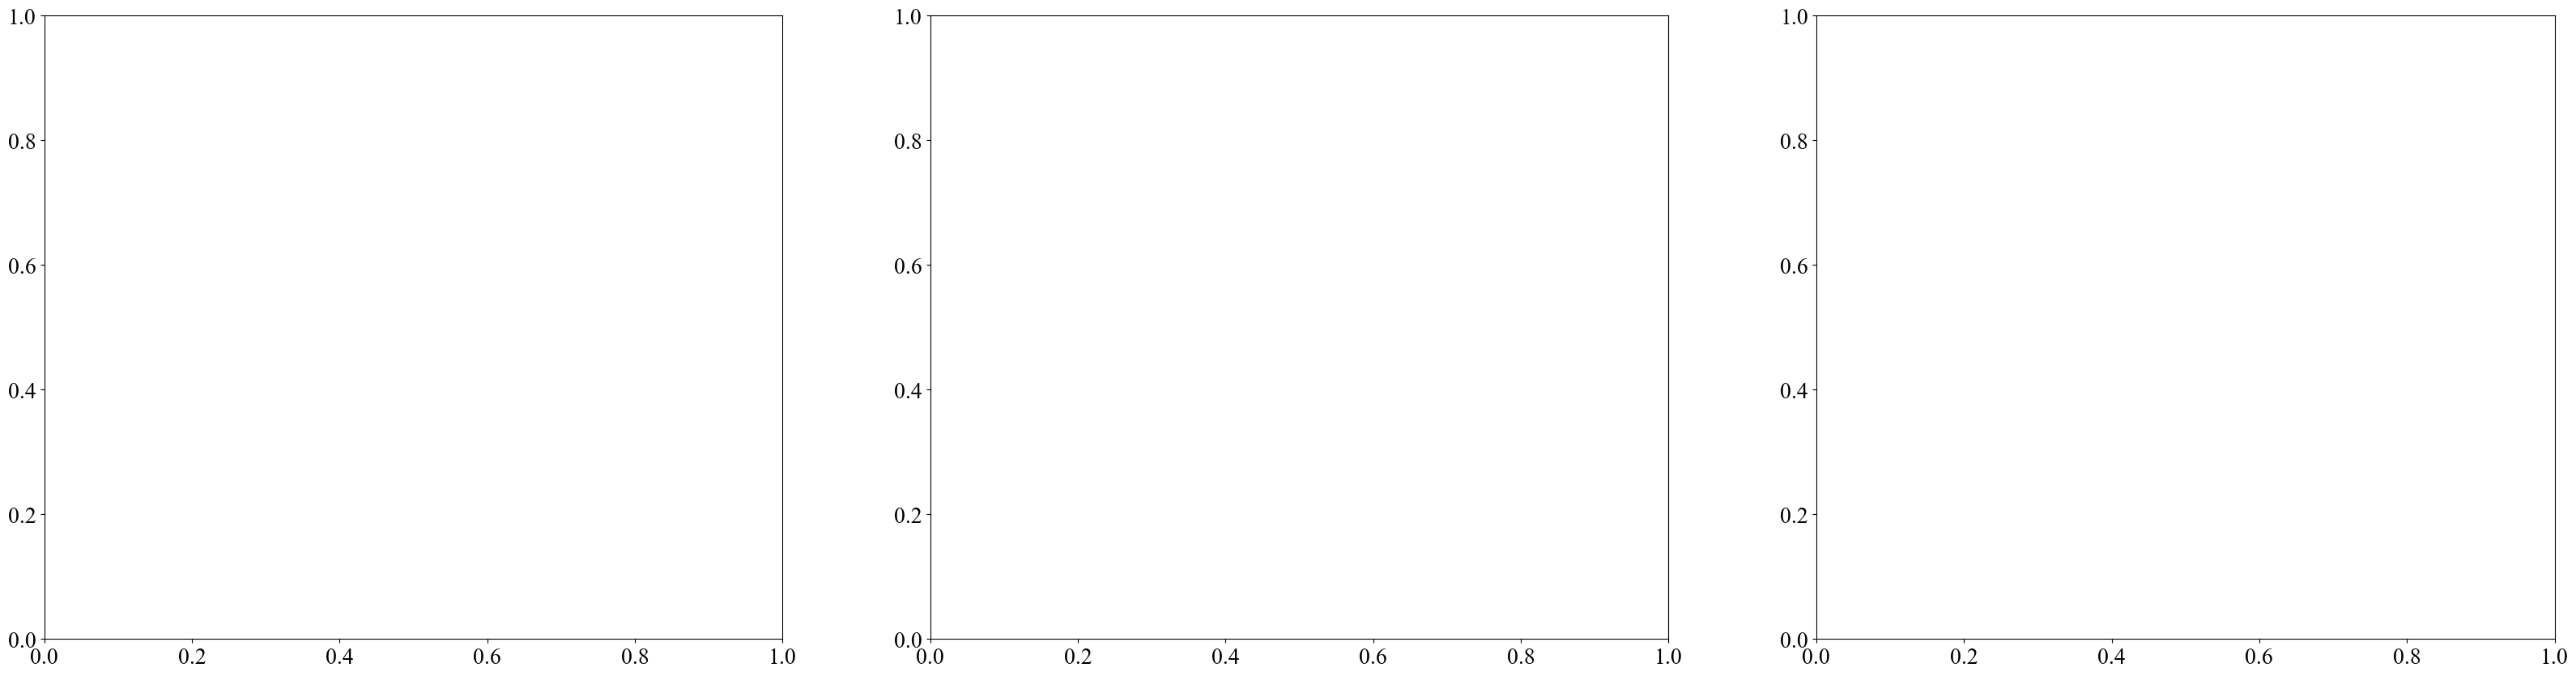

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(40, 10))
axs[0].imshow(plt.imread('sampling_5.png'))
axs[0].set_axis_off()
axs[1].imshow(plt.imread('sampling_15.png'))
axs[1].set_axis_off()
axs[2].imshow(plt.imread('sampling_25.png'))
axs[2].set_axis_off()
plt.gcf().text(0.138, 0.2, r'\textbf{a)}', fontsize=50) 
plt.gcf().text(0.4, 0.2, r'\textbf{b)}', fontsize=50) 
plt.gcf().text(0.665, 0.2, r'\textbf{c)}', fontsize=50) 
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

fig.savefig('fig8.pdf', dpi=300, bbox_inches='tight')
fig.savefig('fig8.png', dpi=300, bbox_inches='tight')

In [ ]:
execution_time = pd.read_csv('5/time.csv', sep='\t')
execution_time

,0
0,27591.777106
1,921.472242
2,856.466292
3,569.336158
4,209.998671
5,611.215145
6,340.107888
7,1731.850828
8,2466.817318
9,1137.633408
